In [ ]:
import networkx
import random
import matplotlib.pyplot as plt
import math

In [ ]:

def FRES_simulation(graph, v, d):
    totalInfected = 500
    infected = {}
    spread = {}
    
    for node in graph.nodes():
        infected[node] = False
    
    i = 0
    while i < 500:
        infectedNode = random.choice(graph.nodes())
        if infected[infectedNode] is True:
            continue
        infected[infectedNode] = True
        i += 1 
    
    totalNodes = graph.number_of_nodes()    
        for t in range(10000):

        spread[t] = totalInfected / totalNodes
        node = random.choice(graph.nodes())
        if infected[node]:
            for neighbor in graph.neighbors(node):
            
                if random.random() < v and infected[neighbor] is False:
                    infected[neighbor] = True
                    totalInfected += 1
            if random.random() < d:
                infected[node] = False
                totalInfected -= 1
    return spread

In [ ]:
# BASIC SIMULATION: New implementation
def SIS_simulation__half_infected(graph, v, d):
    totalInfected = graph.number_of_nodes() / 2
    infected = {}
    spread = {}
    
    for node in graph.nodes():
        infected[node] = False
    
    # p0 = 0.5 --> 500 nodes initially infected in a graph of 1000
    i = 0
    while i < totalInfected:
        infectedNode = random.choice(graph.nodes())
        if infected[infectedNode] is True:
            continue
        infected[infectedNode] = True
        i += 1       
    
    totalNodes = graph.number_of_nodes()    
    # determine the number of infected nodes after timestep t
    # infect a node if it has an infected neighbor instead of infecting all neighbors of an infected node 
    for t in range(10000):
        # get density of infection over time
        spread[t] = totalInfected / totalNodes
        node = random.choice(graph.nodes())
        if infected[node]:
            for neighbor in graph.neighbors(node):
                # infects a neighbor of an infected node with probability v
                if random.random() < v and infected[neighbor] is False:
                    infected[neighbor] = True
                    totalInfected += 1
            if random.random() < d:
                infected[node] = False
                totalInfected -= 1
    return spread

In [ ]:
# FIGURE 5: Probability of Survival in E-R Networks
# 1. look at how likely it is that an infection survives to time t (either survives or dies)
# 2. run 100 simulations, check the time when they die out
# 3. compute how many simulations made it to a given timestep
# 4. compute fraction of infections that survive until time t --> compute probability from frac
graph = networkx.erdos_renyi_graph(1000, 0.015)
lambdaC = 1 / (graph.number_of_edges() / graph.number_of_nodes())
lam0 = lambdaC - 0.1
lam1 = lambdaC - 0.08
lam2 = lambdaC - 0.06
lam3 = lambdaC - 0.04

infection0 = {}
infection0_freq = {}
infection1 = {}
infection1_freq = {}
infection2 = {}
infection2_freq = {}
infection3 = {}
infection3_freq = {}

# initialize time frequencies
for i in range(10000):
    infection0_freq[i] = 0
    infection1_freq[i] = 0
    infection2_freq[i] = 0
    infection3_freq[i] = 0

In [ ]:
# Gets die-out times for 100 simulations at each lambda value
for i in range(100):
    infection0[i] = survivalTime(graph, lam0, 1)
    infection1[i] = survivalTime(graph, lam1, 1)
    infection2[i] = survivalTime(graph, lam2, 1)
    infection3[i] = survivalTime(graph, lam3, 1)
    
# Populates frequency tables for die-out times for each lambda value    
for j in range(10000):
    for k in range(100):
        if infection0[k] > j:
            infection0_freq[j] += 1
        if infection1[k] > j:
            infection1_freq[j] += 1
        if infection2[k] > j:
            infection2_freq[j] += 1
        if infection3[k] > j:
            infection3_freq[j] += 1

    # divide num of times each lambda value gives a certain die-out time by number of simulations (100)
    infection0_freq[j] = infection0_freq[j] / 100
    infection1_freq[j] = infection1_freq[j] / 100
    infection2_freq[j] = infection2_freq[j] / 100
    infection3_freq[j] = infection3_freq[j] / 100

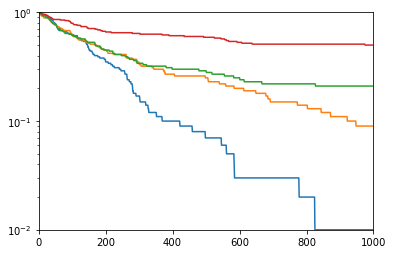

In [ ]:
plt.plot(list(infection0_freq.keys()), list(infection0_freq.values()), 
         list(infection1_freq.keys()), list(infection1_freq.values()),
         list(infection2_freq.keys()), list(infection2_freq.values()),
         list(infection3_freq.keys()), list(infection3_freq.values()))
plt.yscale('log')
#plt.xscale('log')
plt.xlim(0, 1000)
plt.ylim(pow(10, -2), pow(10, 0))
plt.show()